# 1. 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!apt-get -qq -y install fonts-nanum > /dev/null

In [6]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
mpl.rc('font', family='NanumSquareRound') 
fm._rebuild()

In [7]:
%cd '/content/gdrive/MyDrive/sbs/핵심역량프로젝트/재은/D'
!ls

/content/gdrive/.shortcut-targets-by-id/13UT7pZKq5f5I3_As8dIyogN3Up9BH8R9/00_sbs/핵심역량프로젝트/재은/D
지역간거리두기.csv.  E			  OWID_KOREA_COVID데이터.csv
청소년d.ipynb	     체지방률-회귀.ipynb  teen4.csv


In [8]:
data = pd.read_csv('/content/gdrive/MyDrive/sbs/핵심역량프로젝트/재은/D/teen4.csv')

In [9]:
distance_data = pd.read_csv('/content/gdrive/MyDrive/sbs/핵심역량프로젝트/재은/D/OWID_KOREA_COVID데이터.csv')

In [10]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# 2. 데이터 확인 (data, distance_data)

In [11]:
data

,Datetime,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력
0,2018-01-02,2018,1,2,Tuesday,1,15.00,0,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50
1,2018-01-02,2018,1,2,Tuesday,1,17.00,0,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40
2,2018-01-02,2018,1,2,Tuesday,1,17.00,0,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40
3,2018-01-02,2018,1,2,Tuesday,1,18.00,0,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20
4,2018-01-02,2018,1,2,Tuesday,1,15.00,0,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303108,2022-05-30,2022,5,30,Monday,2,18.00,0,177.70,70.90,20.20,77.00,142.00,22.50,6.30,17.46,0.54,48.30,60.98,55.10
303109,2022-05-30,2022,5,30,Monday,1,18.00,1,165.50,60.80,29.80,71.00,109.00,22.20,31.50,19.21,0.51,75.29,23.00,46.70
303110,2022-05-30,2022,5,30,Monday,2,16.00,1,167.60,61.50,22.70,62.00,139.00,21.90,13.70,19.86,0.50,55.48,32.00,63.60
303111,2022-05-30,2022,5,30,Monday,1,16.00,1,152.80,49.70,30.60,72.00,123.00,21.30,15.30,21.14,0.45,43.99,31.00,50.70


In [12]:
distance_data

,Entity,Code,Day,containment_index(종합수치),school_closures(학교 폐쇄),workplace_closures(회사 폐쇄),cancel_public_events(공개행사 취소),restriction_gatherings(모임 제한),close_public_transport(대중교통폐쇄),stay_home_requirements(재택 요구),public_information_campaigns(홍보캠페인),restrictions_internal_movements(국내이동제한),international_travel_controls(국제여행제한),testing_policy(코로나 검사 정책),contact_tracing(접촉자 추적),facial_coverings(마스크 착용),vaccination_policy(백신 접종),"retail_and_recreation(식당,카페,쇼핑센터,테마파크,박물관,도서관,영화관 등)",grocery_and_pharmacy(식료품점과 약국),residential(Time spent at home; 집에서 보내기),transit_stations(교통수단),parks(공원),workplaces(Workplace visitors;직장 출근)
0,South Korea,KOR,2020-01-01,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,South Korea,KOR,2020-01-02,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,South Korea,KOR,2020-01-03,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,South Korea,KOR,2020-01-04,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,South Korea,KOR,2020-01-05,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,South Korea,KOR,2022-06-29,38.10,0,0,0,0,0,0,2,0,1,3,2,3,5,4.00,12.86,-0.14,-9.71,10.57,6.57
911,South Korea,KOR,2022-06-30,38.10,0,0,0,0,0,0,2,0,1,3,2,3,5,4.43,13.14,0.00,-9.86,10.29,6.43
912,South Korea,KOR,2022-07-01,38.10,0,0,0,0,0,0,2,0,1,3,2,3,5,4.71,13.29,0.00,-9.71,10.71,6.43
913,South Korea,KOR,2022-07-02,38.10,0,0,0,0,0,0,2,0,1,3,2,3,5,4.71,13.29,0.00,-10.00,9.86,6.14


In [13]:
distance_data.columns

Index(['Entity', 'Code', 'Day', 'containment_index(종합수치)',
       'school_closures(학교 폐쇄)', 'workplace_closures(회사 폐쇄)',
       'cancel_public_events(공개행사 취소)', 'restriction_gatherings(모임 제한)',
       'close_public_transport(대중교통폐쇄)', 'stay_home_requirements(재택 요구)',
       'public_information_campaigns(홍보캠페인)',
       'restrictions_internal_movements(국내이동제한)',
       'international_travel_controls(국제여행제한)', 'testing_policy(코로나 검사 정책)',
       'contact_tracing(접촉자 추적)', 'facial_coverings(마스크 착용)',
       'vaccination_policy(백신 접종)',
       'retail_and_recreation(식당,카페,쇼핑센터,테마파크,박물관,도서관,영화관 등)',
       'grocery_and_pharmacy(식료품점과 약국)',
       'residential(Time spent at home; 집에서 보내기)', 'transit_stations(교통수단)',
       'parks(공원)', 'workplaces(Workplace visitors;직장 출근)'],
      dtype='object')

In [14]:
distance_data['Day']= distance_data['Day'].astype('str')

In [15]:
distance_data['Datetime'] = pd.to_datetime(distance_data['Day'])

In [16]:
d_data = distance_data.drop(['Day'], axis=1)

In [17]:
d_data['Datetime'] = d_data['Datetime'].astype('str')

In [18]:
d_data = d_data[['Datetime', 'school_closures(학교 폐쇄)',  'restriction_gatherings(모임 제한)', 'close_public_transport(대중교통폐쇄)', 'retail_and_recreation(식당,카페,쇼핑센터,테마파크,박물관,도서관,영화관 등)']]

In [19]:
d_data.rename(columns={'school_closures(학교 폐쇄)': '학교폐쇄',
                       'restriction_gatherings(모임 제한)': '모임제한',
                       'close_public_transport(대중교통폐쇄)': '대중교통폐쇄',
                       'retail_and_recreation(식당,카페,쇼핑센터,테마파크,박물관,도서관,영화관 등)': '시설제한'}, inplace=True)

In [20]:
data

,Datetime,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력
0,2018-01-02,2018,1,2,Tuesday,1,15.00,0,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50
1,2018-01-02,2018,1,2,Tuesday,1,17.00,0,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40
2,2018-01-02,2018,1,2,Tuesday,1,17.00,0,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40
3,2018-01-02,2018,1,2,Tuesday,1,18.00,0,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20
4,2018-01-02,2018,1,2,Tuesday,1,15.00,0,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303108,2022-05-30,2022,5,30,Monday,2,18.00,0,177.70,70.90,20.20,77.00,142.00,22.50,6.30,17.46,0.54,48.30,60.98,55.10
303109,2022-05-30,2022,5,30,Monday,1,18.00,1,165.50,60.80,29.80,71.00,109.00,22.20,31.50,19.21,0.51,75.29,23.00,46.70
303110,2022-05-30,2022,5,30,Monday,2,16.00,1,167.60,61.50,22.70,62.00,139.00,21.90,13.70,19.86,0.50,55.48,32.00,63.60
303111,2022-05-30,2022,5,30,Monday,1,16.00,1,152.80,49.70,30.60,72.00,123.00,21.30,15.30,21.14,0.45,43.99,31.00,50.70


In [21]:
d_data

,Datetime,학교폐쇄,모임제한,대중교통폐쇄,시설제한
0,2020-01-01,0,0,0,NaN
1,2020-01-02,0,0,0,NaN
2,2020-01-03,0,0,0,NaN
3,2020-01-04,0,0,0,NaN
4,2020-01-05,0,0,0,NaN
...,...,...,...,...,...
910,2022-06-29,0,0,0,4.00
911,2022-06-30,0,0,0,4.43
912,2022-07-01,0,0,0,4.71
913,2022-07-02,0,0,0,4.71


# 3. 데이터 합치기 (data + d_data)

In [22]:
df = pd.merge(data, d_data, how='outer', on='Datetime')

In [23]:
df.set_index('Datetime', inplace=True)

In [24]:
df

,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력,학교폐쇄,모임제한,대중교통폐쇄,시설제한
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50,NaN,NaN,NaN,NaN
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40,NaN,NaN,NaN,NaN
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40,NaN,NaN,NaN,NaN
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,18.00,0.00,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20,NaN,NaN,NaN,NaN
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,4.00
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,4.43
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,4.71


In [25]:
df['학교폐쇄'].fillna(0, inplace=True)
df['모임제한'].fillna(0, inplace=True)
df['대중교통폐쇄'].fillna(0, inplace=True)
df['시설제한'].fillna(0, inplace=True)

In [26]:
df

,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력,학교폐쇄,모임제한,대중교통폐쇄,시설제한
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,18.00,0.00,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,4.00
2022-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,4.43
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,4.71


In [27]:
df = df.dropna()

In [28]:
df

,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력,학교폐쇄,모임제한,대중교통폐쇄,시설제한
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,18.00,0.00,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,2022.00,5.00,30.00,Monday,2.00,18.00,0.00,177.70,70.90,20.20,77.00,142.00,22.50,6.30,17.46,0.54,48.30,60.98,55.10,0.00,0.00,0.00,8.57
2022-05-30,2022.00,5.00,30.00,Monday,1.00,18.00,1.00,165.50,60.80,29.80,71.00,109.00,22.20,31.50,19.21,0.51,75.29,23.00,46.70,0.00,0.00,0.00,8.57
2022-05-30,2022.00,5.00,30.00,Monday,2.00,16.00,1.00,167.60,61.50,22.70,62.00,139.00,21.90,13.70,19.86,0.50,55.48,32.00,63.60,0.00,0.00,0.00,8.57


In [ ]:
# df.to_csv('/content/gdrive/MyDrive/sbs/핵심역량프로젝트/data.csv', index = None)

# 4. 데이터 탐색(df)

In [29]:
df.describe()

,년,월,일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력,학교폐쇄,모임제한,대중교통폐쇄,시설제한
count,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00
mean,2019.34,6.19,15.77,1.59,15.48,0.44,166.15,62.56,25.33,75.13,119.95,22.52,10.20,21.26,0.49,53.10,38.50,51.50,0.23,0.92,0.00,0.46
std,1.45,2.54,8.35,0.99,1.65,0.50,8.46,14.26,9.33,8.10,10.08,4.15,10.05,3.06,0.09,8.31,20.28,12.41,0.57,1.67,0.00,4.57
min,2018.00,1.00,1.00,1.00,13.00,0.00,140.00,25.00,5.00,50.00,80.00,10.60,-41.00,10.10,0.00,20.22,1.00,0.00,0.00,0.00,0.00,-30.00
25%,2018.00,4.00,9.00,1.00,14.00,0.00,159.90,52.20,17.60,70.00,114.00,19.50,4.00,19.00,0.43,47.34,21.00,42.50,0.00,0.00,0.00,0.00
50%,2019.00,5.00,16.00,1.00,16.00,0.00,166.00,60.10,25.60,76.00,120.00,21.80,10.80,20.87,0.49,52.35,35.00,50.50,0.00,0.00,0.00,0.00
75%,2021.00,8.00,23.00,2.00,17.00,1.00,172.40,70.60,32.50,80.00,125.00,24.80,17.30,23.06,0.55,58.18,55.00,59.70,0.00,0.00,0.00,0.00
max,2022.00,12.00,31.00,12.00,18.00,1.00,201.20,120.00,50.00,100.00,160.00,45.20,49.00,78.10,2.00,99.98,130.00,100.00,3.00,4.00,0.00,14.86


In [30]:
df.isnull().sum()

년          0
월          0
일          0
요일         0
회차         0
나이         0
성별         0
신장         0
체중         0
체지방률       0
이완기혈압      0
수축기혈압      0
BMI        0
유연성(cm)    0
일리노이       0
체공시간       0
협응력        0
심폐지구력      0
근력         0
학교폐쇄       0
모임제한       0
대중교통폐쇄     0
시설제한       0
dtype: int64

In [31]:
mpl.rc('axes', unicode_minus=False)

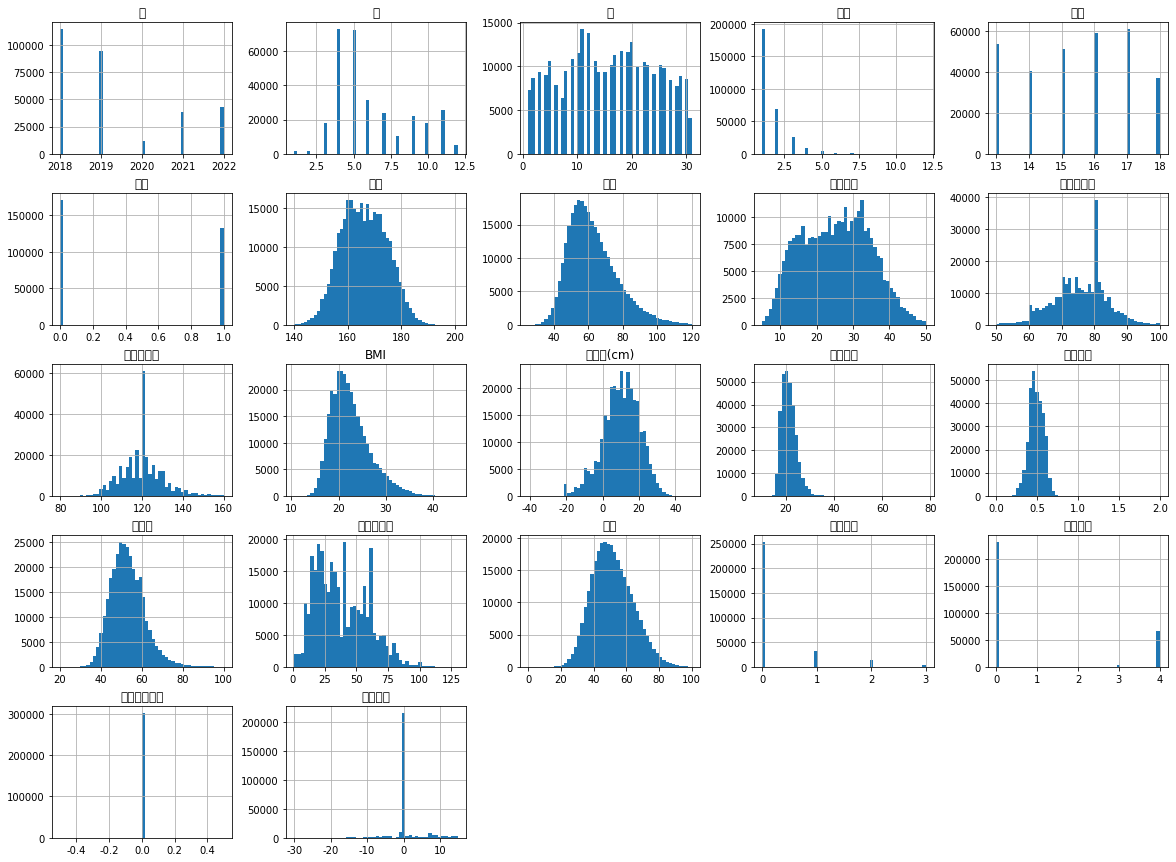

In [32]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [33]:
corr = df.corr()

In [34]:
corr['체지방률'].sort_values(ascending=False)

체지방률       1.00
BMI        0.59
성별         0.56
일리노이       0.51
체중         0.31
협응력        0.21
이완기혈압      0.08
유연성(cm)    0.07
수축기혈압      0.05
년          0.03
모임제한       0.02
나이         0.02
회차         0.00
학교폐쇄      -0.01
시설제한      -0.01
일         -0.01
월         -0.03
신장        -0.38
심폐지구력     -0.58
체공시간      -0.59
근력        -0.73
대중교통폐쇄      NaN
Name: 체지방률, dtype: float64

# 5. 데이터 준비

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df.columns

Index(['년', '월', '일', '요일', '회차', '나이', '성별', '신장', '체중', '체지방률', '이완기혈압',
       '수축기혈압', 'BMI', '유연성(cm)', '일리노이', '체공시간', '협응력', '심폐지구력', '근력', '학교폐쇄',
       '모임제한', '대중교통폐쇄', '시설제한'],
      dtype='object')

In [37]:
X = df.drop(['체지방률', '년', '월', '일', '요일'], axis=1)
y = df[['체지방률']]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=10)

# #

In [ ]:
train = df.loc['2018-01-01':'2021-12-31']
test = df.loc['2022-01-01':'2022-12-31']

,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력,학교폐쇄,모임제한,대중교통폐쇄,시설제한
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,17.00,0.00,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,18.00,0.00,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20,0.00,0.00,0.00,0.00
2018-01-02,2018.00,1.00,2.00,Tuesday,1.00,15.00,0.00,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,2020.00,12.00,30.00,Wednesday,1.00,18.00,0.00,165.60,83.20,21.90,81.00,154.00,30.30,13.20,18.44,0.62,44.65,40.96,58.10,3.00,4.00,0.00,-23.00
2020-12-31,2020.00,12.00,31.00,Thursday,1.00,18.00,0.00,178.40,82.40,20.90,72.00,127.00,25.90,0.60,18.53,0.57,58.66,60.98,67.20,3.00,4.00,0.00,-23.43
2020-12-31,2020.00,12.00,31.00,Thursday,2.00,18.00,0.00,183.20,72.00,8.90,60.00,101.00,21.50,19.60,18.37,0.67,54.20,60.98,62.00,3.00,4.00,0.00,-23.43


In [ ]:
train

In [ ]:
test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train/validation
X = train.drop(['체지방률', '년', '월', '일', '요일'], axis=1)
y = train[['체지방률']]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size= 0.2, random_state=10)

In [ ]:
# test
test_X = test.drop(['체지방률', '년', '월', '일', '요일'], axis=1)
test_y = test[['체지방률']]

# 6. LinearRegression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)

mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, pred_y)

print(f"MSE: {mse}\n")
print(f"RMSE : {rmse}\n")
print(f"R2: {r2}\n")

MSE: 14.242984163846508

RMSE : 3.7739878330284147

R2: 0.836876695356299



In [39]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LinearRegression()

nmse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)  # train_test_split X

mse = -1 * nmse
rmse = np.sqrt(mse)
avg_rmse = np.mean(rmse)

print(f"MSE: {np.round(mse, 2)}\n")
print(f"RMSE: {np.round(rmse, 2)}\n")
print(f"평균 RMSE: {avg_rmse :.4f}\n")

MSE: [15.36 14.73 13.6  13.77 13.89]

RMSE: [3.92 3.84 3.69 3.71 3.73]

평균 RMSE: 3.7769



# 7. Polynominal Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [43]:
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('linear', LinearRegression())])
pipe.fit(train_X, train_y)
pred_y = pipe.predict(test_X)

In [44]:
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2_score = r2_score(test_y, pred_y)
print(f'MSE: {mse:.4f}\n')
print(f"RMSE : {rmse:.4f}\n")
print(f"R2 score: {r2_score:.4f}\n")

MSE: 13.0991

RMSE : 3.6193

R2 score: 0.8500



# 8. GridSearch
```
class sklearn.model_selection.GridSearchCV(estimator, 
                                           param_grid, 
                                           scoring=None, 
                                           fit_params=None, 
                                           n_jobs=None, 
                                           iid='warn', 
                                           refit=True, 
                                           cv='warn', 
                                           verbose=0, 
                                           pre_dispatch='2*n_jobs',  
                                           error_score='raise-deprecating',
                                           return_train_score='warn')
```

## 시도1

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
from sklearn.cross_decomposition import PLSRegression 
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit

In [ ]:
ss = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# 파이프라인
pipe_linear = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('fit', LinearRegression())])
pipe_lasso = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('fit', Lasso())])
pipe_ridge = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('fit', Ridge())])
pipe_pca = Pipeline([("scl", StandardScaler()), ("pca", PCA()), ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([('scl', StandardScaler()), ('fit', PLSRegression())])
pipe_gbr = Pipeline([('scl', StandardScaler()), ('fit', GradientBoostingRegressor())])
pipe_rfr = Pipeline([('scl', StandardScaler()), ('fit', RandomForestRegressor())])
pipe_svr = Pipeline([('scl', StandardScaler()), ('fit', SVR())])
pipe_kr = Pipeline([('scl', StandardScaler()), ('fit', KernelRidge())])

In [ ]:
# params
params_linear = [{"poly__degree" : np.arange(1,3), "fit__fit_intercept" : [True, False]}]
params_lasso = [{"poly__degree" : np.arange(1,3), "fit__tol" : np.logspace(-5,0,10) , "fit__alpha" : np.logspace(-5,1,10)}]
params_ridge = [{"poly__degree" : np.arange(1,3), "fit__alpha" : np.linspace(2,5,10) , "fit__solver" : [ "cholesky","lsqr","sparse_cg"], "fit__tol" : np.logspace(-5,0,10)}]
params_pls = [{"fit__n_components" : np.arange(2,8)}]
params_pca = [{"pca__n_components" : np.arange(2,8)}]
min_samples_split_range = [0.5, 0.7 , 0.9]
params_gbr =[{"fit__max_features" : ["sqrt","log2"], "fit__loss" : ["ls","lad","huber","quantile"], "fit__max_depth" : [5,6,7,8], "fit__min_samples_split" : min_samples_split_range}]
params_rfr =[{"fit__max_features" : ["sqrt","log2"], "fit__max_depth" : [5,6,7,8], "fit__min_samples_split" : min_samples_split_range}]
params_svr =[{"fit__kernel" : ["rbf", "linear", "poly"], "fit__degree" : [2, 3, 5], "fit__C": [1, 100, 10, 0.1, 0.01, 0.001], "fit__gamma" : ['auto', 'scale', 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001], "fit__alpha": [0.5, 1, 1.5, 2, 2.5, 3, 3.5 ,4 ,4.5 ,5]}]
params_kr =[{"fit__kernel" : ["rbf","linear"], "fit__gamma" : np.logspace(-5,1,10)}]

In [ ]:
pipe = [pipe_linear, pipe_lasso, pipe_ridge, pipe_pca, pipe_pls, pipe_gbr, pipe_rfr, pipe_svr, pipe_kr ]
params = [params_linear, params_lasso, params_ridge, params_pca, params_pls, params_gbr, params_rfr, params_svr, params_kr]
grid_dict = {0: 'Linear', 
             1: 'Lasso',  
             2: 'Ridge',
             3: 'PCA regression',
             4: 'PLSRegression',
             5: "GradientDescentRegressor",
             6: "RandomForestRegressor",
             7: "SupportVectorRegressor",
             8: "Kernel RidgeRegression"}

model_mse = {}
model_r2 = {}
model_best_params = {}

In [ ]:
for i, (param, model) in enumerate(zip(params, pipe)):
    grid = GridSearchCV(model, param, scoring  = 'neg_mean_squared_error', cv=cv, n_jobs=1, verbose=1, return_train_score=True, refit=True)
    grid.fit(train_X, train_y)
    pred_y = grid.predict(test_X)
    model_mse[grid_dict.get(i)] = mean_squared_error(test_y, pred_y)
    model_r2[grid_dict.get(i)] = r2_score(test_y, pred_y)
    model_best_params[grid_dict.get(i)] = grid.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [ ]:
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["model","r2"]).T
output.sort_values(["r2"], ascending= False ,inplace=True)
ax = sns.barplot(y="model", x="r2", data=output)
plt.show()

In [ ]:
model_mse , model_r2
model_best_params

## 시도2

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [ ]:
# LinearRegression
pipe = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('model', LinearRegression())])
param = [{"poly__degree" : np.arange(1,3), "model__fit_intercept" : [True, False]}]
grid = GridSearchCV(pipe, param, cv=5, scoring  = 'neg_mean_squared_error', return_train_score=True)
grid.fit(train_X, train_y)
pred_y = grid.predict(test_X)

In [ ]:
print(f"최적의 하이퍼 파라미터 : {grid.best_params_}\n")
print(f"최적의 모델 평균 성 : {grid.best_score_}\n")
print(f'MSE: {mean_squared_error(test_y, pred_y):.2f}')

최적의 파라미터 : {'model__fit_intercept': True, 'poly__degree': 2}

최적의 파라미터로 모델의 점수 : -12.978392415581117

MSE: 13.10


In [ ]:
# Lasso
pipe = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('model', Lasso())])
param = [{"poly__degree": np.arange(1,3), "model__alpha": [0.01, 0.1, 1, 10], 'model__max_iter': [100, 300, 500, 1000]}]
# param = {'alpha': [0.01, 0.1, 1, 10], 'max_iter': [100, 300, 500, 1000]}
grid = GridSearchCV(pipe, param, cv=5, scoring  = 'neg_mean_squared_error', return_train_score=True)
grid.fit(train_X, train_y)
pred_y = grid.predict(test_X)

In [ ]:
print(f"최적의 하이퍼 파라미터 : {grid.best_params_}\n")
print(f"최적의 모델 평균 성능 : {grid.best_score_}\n")
print(f'MSE: {mean_squared_error(test_y, pred_y):.2f}')

최적의 파라미터 : {'model__alpha': 0.01, 'model__max_iter': 1000, 'poly__degree': 2}

최적의 파라미터로 모델의 점수 : -13.030731992412347

MSE: 13.13


In [46]:
# Ridge
pipe = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('model', Ridge())])
param = [{"poly__degree" : np.arange(1,3), "model__alpha" : [0.01, 0.1, 1, 10], "model__solver": [ "cholesky", "lsqr", "sparse_cg"]}]
grid = GridSearchCV(pipe, param, cv=5, scoring  = 'neg_mean_squared_error', return_train_score=True)
grid.fit(train_X, train_y)
pred_y = grid.predict(test_X)

In [47]:
print(f"최적의 하이퍼 파라미터 : {grid.best_params_}\n")
print(f"최적의 모델 평균 성능 : {grid.best_score_}\n")
print(f'MSE: {mean_squared_error(test_y, pred_y):.2f}')

최적의 하이퍼 파라미터 : {'model__alpha': 1, 'model__solver': 'cholesky', 'poly__degree': 2}

최적의 모델 평균 성능 : -12.978390016186129

MSE: 13.09


In [ ]:
grid_df = pd.DataFrame(grid.cv_results_)
grid_df = grid_df.sort_values(by='mean_test_score', ascending=False)
print(grid_df[['params', 'mean_test_score']])   

                                               params  mean_test_score
13  {'model__alpha': 1, 'model__solver': 'cholesky...           -12.98
19  {'model__alpha': 10, 'model__solver': 'cholesk...           -12.98
7   {'model__alpha': 0.1, 'model__solver': 'choles...           -12.98
1   {'model__alpha': 0.01, 'model__solver': 'chole...           -12.98
23  {'model__alpha': 10, 'model__solver': 'sparse_...           -12.99
11  {'model__alpha': 0.1, 'model__solver': 'sparse...           -12.99
17  {'model__alpha': 1, 'model__solver': 'sparse_c...           -12.99
5   {'model__alpha': 0.01, 'model__solver': 'spars...           -12.99
21  {'model__alpha': 10, 'model__solver': 'lsqr', ...           -13.00
15  {'model__alpha': 1, 'model__solver': 'lsqr', '...           -13.00
9   {'model__alpha': 0.1, 'model__solver': 'lsqr',...           -13.00
3   {'model__alpha': 0.01, 'model__solver': 'lsqr'...           -13.00
12  {'model__alpha': 1, 'model__solver': 'cholesky...           -14.13
6   {'

In [ ]:
# ElasticNet
pipe = Pipeline([('scl', StandardScaler()), ('poly', PolynomialFeatures()), ('model', ElasticNet())])
param = {"poly__degree" : np.arange(1,3), "model__max_iter": [1, 5, 10], "model__alpha": [0.01, 0.1, 1, 10], "model__l1_ratio": np.arange(0.0, 1.0, 0.1)} 
grid = GridSearchCV(pipe, param, cv=5, scoring  = 'neg_mean_squared_error', return_train_score=True)
grid.fit(train_X, train_y)
pred_y = grid.predict(test_X)
print(f"최적의 하이퍼 파라미터 : {grid.best_params_}\n")
print(f"최적의 모델 평균 성능 : {grid.best_score_}\n")
print(f'MSE: {mean_squared_error(test_y, pred_y):.2f}')

최적의 하이퍼 파라미터 : {'model__alpha': 0.01, 'model__l1_ratio': 0.0, 'model__max_iter': 10, 'poly__degree': 2}

최적의 모델 평균 성능 : -13.079110077142627

MSE: 13.18


## 시도3(시각화)

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [50]:
s_scaler = StandardScaler()
s_scaler.fit(train_X)
scaled_train_X = s_scaler.transform(train_X)
scaled_test_X = s_scaler.transform(test_X)

In [ ]:
'''
mm_scaler = MinMaxScaler()
mm_scaler.fit(train_X)
train_X = mm_scaler.transform(train_X)
test_X = mm_scaler.transform(test_X)
'''

'\nmm_scaler = MinMaxScaler()\nmm_scaler.fit(train_X)\ntrain_X = mm_scaler.transform(train_X)\ntest_X = mm_scaler.transform(test_X)\n'

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [60]:
pf_model = PolynomialFeatures(degree=2, include_bias=False)
poly_train_X = pf_model.fit_transform(train_X)
poly_test_X = pf_model.transform(test_X)

lr_model = LinearRegression()
lr_model.fit(poly_train_X, train_y)
pred_y = lr_model.predict(poly_test_X)

In [61]:
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
r2_score = r2_score(test_y, pred_y)
print(f'MSE: {mse:.4f}\n')
print(f"RMSE : {rmse:.4f}\n")
print(f"R2: {r2_score:.4f}\n")

MSE: 13.0991

RMSE : 3.6193

R2: 0.8500



In [73]:
compare_test_y = test_y.rename(columns={'체지방률': '실측치'})
compare_test_y

,실측치
Datetime,
2018-07-02,30.60
2018-07-10,16.00
2018-06-19,14.60
2022-03-24,21.00
2021-06-08,43.10
...,...
2018-09-14,27.20
2021-09-07,30.40
2019-05-27,17.00


In [80]:
compare_test_y = compare_test_y.rename_axis('Datetime').reset_index()

In [81]:
compare_test_y

,Datetime,실측치
0,2018-07-02,30.60
1,2018-07-10,16.00
2,2018-06-19,14.60
3,2022-03-24,21.00
4,2021-06-08,43.10
...,...,...
60618,2018-09-14,27.20
60619,2021-09-07,30.40
60620,2019-05-27,17.00
60621,2020-10-29,24.50


In [75]:
pred_y = pd.DataFrame(pred_y)

In [76]:
compare_pred_y = pred_y.rename(columns={0: '예측치'})
compare_pred_y

,예측치
0,28.30
1,15.78
2,12.26
3,21.43
4,44.64
...,...
60618,22.96
60619,27.53
60620,17.27
60621,23.73


In [83]:
compare_y = pd.concat([compare_test_y, compare_pred_y], axis=1)

In [84]:
compare_y

,Datetime,실측치,예측치
0,2018-07-02,30.60,28.30
1,2018-07-10,16.00,15.78
2,2018-06-19,14.60,12.26
3,2022-03-24,21.00,21.43
4,2021-06-08,43.10,44.64
...,...,...,...
60618,2018-09-14,27.20,22.96
60619,2021-09-07,30.40,27.53
60620,2019-05-27,17.00,17.27
60621,2020-10-29,24.50,23.73


<Figure size 1800x1080 with 0 Axes>

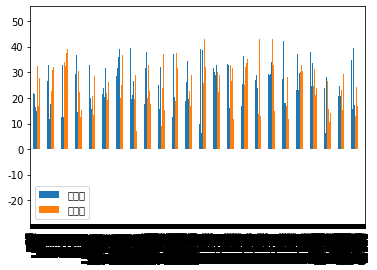

In [87]:
plt.figure(figsize=(25, 15))
mpl.rc('font', family='Batang')
compare_y.plot(y=['실측치', '예측치'], kind="bar")
plt.show()

In [ ]:
scores_df = pd.DataFrame(grid_model.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
print(f"최적의 파라미터 : {grid_model.best_params_}\n")
print(f"최적의 파라미터로 모델의 정확도 : {grid_model.best_score_}\n")

In [ ]:
estimator = grid_model.best_estimator_
pred_y = estimator.predict(test_X)

print(f"정확도: {accuracy_score(test_y, pred_y)}")